# 2025 Ballot Proposal Analysis


This notebook analyzes the 2021 ballot measure results and breaks down each proposal's voter share.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
 #scraped mayoral results (includes mayor, council, public advocate, etc.)
df = pd.read_csv('../data/full_results_2025_copy.csv')

In [3]:
df.dtypes

office       object
id            int64
ad            int64
ed            int64
candidate    object
party        object
votes         int64
dtype: object

### Part 1: Cleaning Values

Filter the `office` column to only display results for the proposals

In [4]:
ballot = df[df['office'].str.contains('Proposal Number', case=False, na=False)].copy()


In [5]:
ballot['office'].value_counts()

office
Proposal Number 1, an Amendment: Amendment to Allow Olympic Sports Complex In Essex County on State Forest Preserve Land                                        8676
Proposal Number 2, a Question: Proposed Charter Amendment: Fast Track Affordable Housing to Build More Affordable Housing Across the City                       8676
Proposal Number 3, a Question: Proposed Charter Amendment: Simplify Review of Modest Housing and Infrastructure Projects                                        8676
Proposal Number 4, a Question: Proposed Charter Amendment: Establish an Affordable Housing Appeals Board with Council, Borough, and Citywide Representation     8676
Proposal Number 5, a Question: Proposed Charter Amendment: Create a Digital City Map to Modernize City Operations                                               8676
Proposal Number 6, a Question: Proposed Charter Amendment: Move Local Elections to Presidential Election Years to Increase Voter Participation                  8676
Nam

Create a new column for proposals and renames the value using regex for readability


In [6]:
ballot["proposal_number"] = ballot["office"].str.extract(r"(Proposal Number \d+)") 
print(ballot["proposal_number"])

209568    Proposal Number 1
209569    Proposal Number 1
209570    Proposal Number 1
209571    Proposal Number 1
209572    Proposal Number 1
                ...        
261619    Proposal Number 6
261620    Proposal Number 6
261621    Proposal Number 6
261622    Proposal Number 6
261623    Proposal Number 6
Name: proposal_number, Length: 52056, dtype: object


### Part 2: Calculate the total votes

Tally up the total number of yes and no votes for ballot proposal.

In [7]:
ballot_results = (
    ballot.groupby(["proposal_number", "candidate"], as_index=False)["votes"].sum()
)
print(ballot_results)


      proposal_number candidate    votes
0   Proposal Number 1        NO   935438
1   Proposal Number 1       YES   779159
2   Proposal Number 2        NO   729659
3   Proposal Number 2       YES  1016339
4   Proposal Number 3        NO   746231
5   Proposal Number 3       YES   976371
6   Proposal Number 4        NO   715603
7   Proposal Number 4       YES   996469
8   Proposal Number 5        NO   457859
9   Proposal Number 5       YES  1254533
10  Proposal Number 6        NO   906478
11  Proposal Number 6       YES   801549


Use the pivot function to reset the dataframe so you can prep it for percentage calculations

In [8]:
ballot_summary = ballot_results.pivot(index="proposal_number", columns="candidate", values="votes").fillna(0).reset_index()
print(ballot_summary)

candidate    proposal_number      NO      YES
0          Proposal Number 1  935438   779159
1          Proposal Number 2  729659  1016339
2          Proposal Number 3  746231   976371
3          Proposal Number 4  715603   996469
4          Proposal Number 5  457859  1254533
5          Proposal Number 6  906478   801549


Rename the columns so they are lower case and consistent with other column names.

In [9]:
ballot_summary = ballot_summary.rename(columns={"YES": "yes", "NO": "no"})


Create a `total_votes` column with the total votes for each proposal

In [10]:
ballot_summary["total_votes"] = (ballot_summary["yes"] + (ballot_summary["no"]))
print(ballot_summary[["proposal_number", "total_votes"]])

candidate    proposal_number  total_votes
0          Proposal Number 1      1714597
1          Proposal Number 2      1745998
2          Proposal Number 3      1722602
3          Proposal Number 4      1712072
4          Proposal Number 5      1712392
5          Proposal Number 6      1708027


In [11]:
ballot_results.head(12)

,proposal_number,candidate,votes
0,Proposal Number 1,NO,935438
1,Proposal Number 1,YES,779159
2,Proposal Number 2,NO,729659
3,Proposal Number 2,YES,1016339
4,Proposal Number 3,NO,746231
5,Proposal Number 3,YES,976371
6,Proposal Number 4,NO,715603
7,Proposal Number 4,YES,996469
8,Proposal Number 5,NO,457859
9,Proposal Number 5,YES,1254533


The next cell preps our dataframe for a bar chart by:
* Creating another simplified `proposal_number` column that is readable for a bar chart
* Creating another dataframe that only shows the proposal number and total number of votes

In [12]:
ballot_summary["proposal"] = ballot_summary["proposal_number"].str.extract(r"Proposal Number (\d+)")

total_votes_per_proposal = (
    ballot_summary.groupby("proposal")["total_votes"]
    .sum()
    .reset_index()
)
print(total_votes_per_proposal)


  proposal  total_votes
0        1      1714597
1        2      1745998
2        3      1722602
3        4      1712072
4        5      1712392
5        6      1708027


Plot the bar chart to see the proposal number and total votes. 

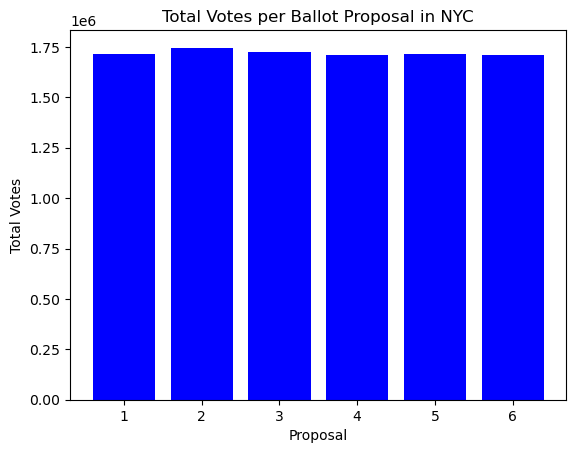

In [13]:
plt.bar(ballot_summary["proposal"], ballot_summary["total_votes"], color='blue')
plt.xlabel("Proposal")
plt.ylabel("Total Votes")
plt.title("Total Votes per Ballot Proposal in NYC")
plt.show()

### Part 3: Calculate the vote share for each proposal

The next cell:
* Creates a `yes_pct` and `no_pct` column
* Calculates the percentage by dividing the yes and no vote share by the total votes and multiplying it by 100.

In [14]:
ballot_summary["yes_pct"] = (ballot_summary["yes"] / (ballot_summary["yes"] + ballot_summary["no"])) * 100
ballot_summary["no_pct"] = (ballot_summary["no"] / (ballot_summary["yes"] + ballot_summary["no"])) * 100

print(ballot_summary[["proposal_number", "yes", "no", "yes_pct", "no_pct"]])


candidate    proposal_number      yes      no    yes_pct     no_pct
0          Proposal Number 1   779159  935438  45.442690  54.557310
1          Proposal Number 2  1016339  729659  58.209631  41.790369
2          Proposal Number 3   976371  746231  56.680011  43.319989
3          Proposal Number 4   996469  715603  58.202517  41.797483
4          Proposal Number 5  1254533  457859  73.262022  26.737978
5          Proposal Number 6   801549  906478  46.928357  53.071643


Round the percentages to the nearest tenth decimal place

In [15]:
ballot_summary["yes_pct"] = ballot_summary["yes_pct"].round(1)
ballot_summary["no_pct"] = ballot_summary["no_pct"].round(1)

In [16]:
ballot_summary.head()

candidate,proposal_number,no,yes,total_votes,proposal,yes_pct,no_pct
0,Proposal Number 1,935438,779159,1714597,1,45.4,54.6
1,Proposal Number 2,729659,1016339,1745998,2,58.2,41.8
2,Proposal Number 3,746231,976371,1722602,3,56.7,43.3
3,Proposal Number 4,715603,996469,1712072,4,58.2,41.8
4,Proposal Number 5,457859,1254533,1712392,5,73.3,26.7


Drop the yes, no, and total votes column so it can be ready for Datawrapper

In [17]:
ballot_summary = ballot_summary.drop(['no', 'yes', 'total_votes'], axis=1)
print(ballot_summary)

candidate    proposal_number proposal  yes_pct  no_pct
0          Proposal Number 1        1     45.4    54.6
1          Proposal Number 2        2     58.2    41.8
2          Proposal Number 3        3     56.7    43.3
3          Proposal Number 4        4     58.2    41.8
4          Proposal Number 5        5     73.3    26.7
5          Proposal Number 6        6     46.9    53.1


Export!

In [18]:
ballot_results.to_csv("../output/ballot_results_2025_only.csv", index=False)
